In [2]:
import scipy.io as sio
import os
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [49]:
plotly.tools.set_credentials_file(username='versag', api_key='suPchLuFTri7xeKqxzlW')
#init_notebook_mode(connected=True)
np.set_printoptions(2)

In [50]:
data = os.listdir('../datasets/')

In [51]:
lm10hz = sio.loadmat('../datasets/nicolas/OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data.mat')
lm30hz = sio.loadmat('../datasets/nicolas/OFVC4kW_LM30Hz_paliers_0to120PercTnom_Data.mat')
lm50hz = sio.loadmat('../datasets/nicolas/OFVC4kW_LM50Hz_paliers_0to120PercTnom_Data.mat')
lm68hz = sio.loadmat('../datasets/nicolas/OFVC4kW_LM68Hz_paliers_0to120PercTnom_Data.mat')
nolm = sio.loadmat('../datasets/nicolas/OFVC4kW_NoLM_paliers_0to100Hz_Data.mat')

data_map = {'lm10hz': lm10hz, 'lm30hz': lm30hz, 'lm50hz': lm50hz, 'lm68hz': lm68hz, 'nolm': nolm}

In [41]:
print_stmt = [['rate','aa', 'VdRef_V', 'VariableSpd', 'IdMeas_A', 'bb', 'VariableQ', \
        'Time_VSpdTq', 'VariableTq', 'Speed_Hz', 'IqMeas_A', 'VqRef_V', \
        'Time', 'Torque_PercTnom', 'VariableD', 'Time_I']]
for k in data_map.keys():
    this_row = [k]
    for dk in data_map[k].keys():
        if '__' not in dk:
            this_row.append(dk)
    print_stmt.append(this_row)

print "Features in each dataset"
table = ff.create_table(print_stmt)
#py.iplot(table, filename='features-in-each-dataset')

Features in each dataset


In [52]:
print_stmt = [['rate','aa', 'VdRef_V', 'VariableSpd', 'IdMeas_A', 'bb', 'VariableQ', \
        'Time_VSpdTq', 'VariableTq', 'Speed_Hz', 'IqMeas_A', 'VqRef_V', \
        'Time', 'Torque_PercTnom', 'VariableD', 'Time_I']]

for k in data_map.keys():
    this_row = [k]
    for dk in print_stmt[0][1:]:
        this_row.append(data_map[k][dk].shape)
    print_stmt.append(this_row)

print "Dimension of each feature in the dataset"
table = ff.create_table(print_stmt)
py.iplot(table, filename='feat-dimensions')
#pio.write_image(table, '../docs/images/dimension_of_features_in_dataset.pdf', height=300, width=1200)

Dimension of each feature in the dataset


In [53]:
print_stmt = [['rate','aa', 'VdRef_V', 'VariableSpd', 'IdMeas_A', 'bb', 'VariableQ', \
        'Time_VSpdTq', 'VariableTq', 'Speed_Hz', 'IqMeas_A', 'VqRef_V', \
        'Time', 'Torque_PercTnom', 'VariableD', 'Time_I']]


for k in data_map.keys():
    this_row = [k]
    for dk in print_stmt[0][1:]:
        this_row.append(np.around(data_map[k][dk].max(), 2))
    print_stmt.append(this_row)

print "Maxiumum value of each feature in the dataset"
table = ff.create_table(print_stmt)
py.iplot(table, filename='feat-max')
#pio.write_image(table, '../docs/images/max_values_of_features_in_dataset.pdf', height=300, width=1200)

Maxiumum value of each feature in the dataset


In [54]:
print_stmt = [['rate','aa', 'VdRef_V', 'VariableSpd', 'IdMeas_A', 'bb', 'VariableQ', \
        'Time_VSpdTq', 'VariableTq', 'Speed_Hz', 'IqMeas_A', 'VqRef_V', \
        'Time', 'Torque_PercTnom', 'VariableD', 'Time_I']]


for k in data_map.keys():
    this_row = [k]
    for dk in print_stmt[0][1:]:
        this_row.append(np.around(data_map[k][dk].min(), 2))
    print_stmt.append(this_row)

print "Minimum value of each feature in the dataset"
table = ff.create_table(print_stmt)
py.iplot(table, filename='feat-min')
#pio.write_image(table, '../docs/images/min_values_of_features_in_dataset.pdf', height=300, width=1200)

Minimum value of each feature in the dataset


In [72]:
print_stmt = [['rate','aa', 'VdRef_V', 'VariableSpd', 'IdMeas_A', 'bb', 'VariableQ', \
        'Time_VSpdTq', 'VariableTq', 'Speed_Hz', 'IqMeas_A', 'VqRef_V', \
        'Time', 'Torque_PercTnom', 'VariableD', 'Time_I']]


for k in data_map.keys():
    this_row = [k]
    for dk in print_stmt[0][1:]:
        this_row.append(np.around(data_map[k][dk].mean(), 2))
    print_stmt.append(this_row)

print "Mean value of each feature in the dataset"
table = ff.create_table(print_stmt)
py.iplot(table, filename='feat-mean')
#pio.write_image(table, '../docs/images/mean_values_of_features_in_dataset.pdf', height=300, width=1200)

Mean value of each feature in the dataset


In [56]:
print_stmt = [['rate','aa', 'VdRef_V', 'VariableSpd', 'IdMeas_A', 'bb', 'VariableQ', \
        'Time_VSpdTq', 'VariableTq', 'Speed_Hz', 'IqMeas_A', 'VqRef_V', \
        'Time', 'Torque_PercTnom', 'VariableD', 'Time_I']]

for k in data_map.keys():
    this_row = [k]
    for dk in print_stmt[0][1:]:
        this_row.append(np.around(data_map[k][dk].std(), 2))
    print_stmt.append(this_row)

print "Standard deviation value of each feature in the dataset"
table = ff.create_table(print_stmt)
py.iplot(table, filename='feat-std')
#pio.write_image(table, '../docs/images/std_values_of_features_in_dataset.pdf', height=300, width=1200)

Standard deviation value of each feature in the dataset


In [57]:
current_table = np.hstack([data_map['nolm']['Time_I'], data_map['nolm']['IdMeas_A'], data_map['nolm']['IqMeas_A'], data_map['nolm']['bb']])
variable_table = np.hstack([data_map['nolm']['Time'], data_map['nolm']['VariableSpd'], data_map['nolm']['VariableQ'], data_map['nolm']['VariableTq'], data_map['nolm']['VariableD']])
voltag_torque_table = np.hstack([data_map['nolm']['Time_VSpdTq'], data_map['nolm']['VdRef_V'], data_map['nolm']['Speed_Hz'], data_map['nolm']['VqRef_V'], data_map['nolm']['Torque_PercTnom'], data_map['nolm']['aa']])

In [58]:
trace1=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='IdMeas_A vs Time'
)

trace2=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='IqMeas_A vs Time'
)

trace3=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='bb vs Time'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout1 = dict(
    autosize=False,
    title='nolm: Current variable vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, title='Time_I', **dict(domain=[0, 1], anchor='y2')),          
    #xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')), 
    yaxis1=dict(axis, title='IdMeas_A', **dict(domain=[0.64, 1], anchor='x1', ticksuffix='A', hoverformat='.2f')),  
    yaxis2=dict(axis, title='IqMeas_A', **dict(domain=[0.22, 0.62], anchor='x2', ticksuffix='A', hoverformat='.2f')),
    #yaxis3=dict(axis, **dict(domain=[0, 0.2], anchor='x3', hoverformat='.2f')),
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace1, trace2], layout=layout1)
py.iplot(fig2, filename='nolm-current-vs-time')
#pio.write_image(fig2, '../docs/images/nolm_current_vs_time.pdf', height=600, width=1200)

In [59]:
#'Time_VSpdTq', 'VdRef_V', 'Speed_Hz', 'VqRef_V', 'Torque_PercTnom', 'aa']
trace8=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='VdRef_V vs Time_VSpdTq'
)

trace9=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='SpeedHz vs Time_VSpdTq'
)

trace10=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='VqRef_V vs Time_VSpdTq'
)

trace11=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,4],
    xaxis='x4',
    yaxis='y4',
    mode='lines',
    line=dict(width=2, color='#ff7bbd'),
    name='Torque_PercTnom vs Time_VSpdTq'
)

trace12=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,5],
    xaxis='x5',
    yaxis='y5',
    mode='lines',
    line=dict(width=2, color='#afaabd'),
    name='aa vs Time_VSpdTq'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout3 = dict(
    height=1200,
    autosize=False,
    title='nolm: Voltage, Torque and Speed vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2')),          
    xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')),
    xaxis4=dict(axis, title='Time_VSpdTq', **dict(domain=[0, 1], anchor='y4')),
    #xaxis5=dict(axis, **dict(domain=[0, 1], anchor='y5')),
    
    yaxis1=dict(axis, title='VdRef_V', **dict(domain=[0.80, 1], anchor='x1', ticksuffix='V', hoverformat='.2f')),  
    yaxis2=dict(axis, title='SpeedHz', **dict(domain=[0.60, 0.79], anchor='x2', ticksuffix='Hz', hoverformat='.2f')),
    yaxis3=dict(axis, title='VqRef_V', **dict(domain=[0.40, 0.59], anchor='x2', ticksuffix='V', hoverformat='.2f')),
    yaxis4=dict(axis, title='Torque_PercTnom', **dict(domain=[0.20, 0.39], anchor='x4', ticksuffix='N-m', hoverformat='.2f')),
    #yaxis5=dict(axis, **dict(domain=[0, 0.19], anchor='x5', hoverformat='.2f')),
    
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace8, trace9, trace10, trace11], layout=layout3)
py.iplot(fig2, filename='nolm-voltage-torque-speed-vs-time')
#pio.write_image(fig2, '../docs/images/nolm_voltage_torque_speed_vs_time.pdf', height=1200, width=1200)

The draw time for this plot will be slow for clients without much RAM.


/home/sv/anaconda2/lib/python2.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [60]:
current_table = np.hstack([data_map['lm10hz']['Time_I'], data_map['lm10hz']['IdMeas_A'], data_map['lm10hz']['IqMeas_A'], data_map['lm10hz']['bb']])
variable_table = np.hstack([data_map['lm10hz']['Time'], data_map['lm10hz']['VariableSpd'], data_map['lm10hz']['VariableQ'], data_map['lm10hz']['VariableTq'], data_map['lm10hz']['VariableD']])
voltag_torque_table = np.hstack([data_map['lm10hz']['Time_VSpdTq'], data_map['lm10hz']['VdRef_V'], data_map['lm10hz']['Speed_Hz'], data_map['lm10hz']['VqRef_V'], data_map['lm10hz']['Torque_PercTnom'], data_map['lm10hz']['aa']])

In [61]:
trace1=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='IdMeas_A vs Time'
)

trace2=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='IqMeas_A vs Time'
)

trace3=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='bb vs Time'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout1 = dict(
    autosize=False,
    title='lm10hz: Current variable vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, title='Time_I', **dict(domain=[0, 1], anchor='y2')),          
    #xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')), 
    yaxis1=dict(axis, title='IdMeas_A', **dict(domain=[0.64, 1], anchor='x1', ticksuffix='A', hoverformat='.2f')),  
    yaxis2=dict(axis, title='IqMeas_A', **dict(domain=[0.22, 0.62], anchor='x2', ticksuffix='A', hoverformat='.2f')),
    #yaxis3=dict(axis, **dict(domain=[0, 0.2], anchor='x3', hoverformat='.2f')),
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace1, trace2], layout=layout1)
py.iplot(fig2, filename='lm10hz-current-vs-time')
#pio.write_image(fig2, '../docs/images/lm10hz_current_vs_time.pdf', height=600, width=1200)

In [62]:
#'Time_VSpdTq', 'VdRef_V', 'Speed_Hz', 'VqRef_V', 'Torque_PercTnom', 'aa']
trace8=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='VdRef_V vs Time_VSpdTq'
)

trace9=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='SpeedHz vs Time_VSpdTq'
)

trace10=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='VqRef_V vs Time_VSpdTq'
)

trace11=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,4],
    xaxis='x4',
    yaxis='y4',
    mode='lines',
    line=dict(width=2, color='#ff7bbd'),
    name='Torque_PercTnom vs Time_VSpdTq'
)

trace12=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,5],
    xaxis='x5',
    yaxis='y5',
    mode='lines',
    line=dict(width=2, color='#afaabd'),
    name='aa vs Time_VSpdTq'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout3 = dict(
    height=1200,
    autosize=False,
    title='lm10hz: Voltage, Torque and Speed vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2')),          
    xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')),
    xaxis4=dict(axis, title='Time_VSpdTq', **dict(domain=[0, 1], anchor='y4')),
    #xaxis5=dict(axis, **dict(domain=[0, 1], anchor='y5')),
    
    yaxis1=dict(axis, title='VdRef_V', **dict(domain=[0.80, 1], anchor='x1', ticksuffix='V', hoverformat='.2f')),  
    yaxis2=dict(axis, title='SpeedHz', **dict(domain=[0.60, 0.79], anchor='x2', ticksuffix='Hz', hoverformat='.2f')),
    yaxis3=dict(axis, title='VqRef_V', **dict(domain=[0.40, 0.59], anchor='x2', ticksuffix='V', hoverformat='.2f')),
    yaxis4=dict(axis, title='Torque_PercTnom', **dict(domain=[0.20, 0.39], anchor='x4', ticksuffix='N-m', hoverformat='.2f')),
    #yaxis5=dict(axis, **dict(domain=[0, 0.19], anchor='x5', hoverformat='.2f')),
    
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace8, trace9, trace10, trace11], layout=layout3)
py.iplot(fig2, filename='lm10hz-voltage-torque-speed-vs-time')
#pio.write_image(fig2, '../docs/images/lm10hz_voltage_torque_speed_vs_time.pdf', height=1200, width=1200)

The draw time for this plot will be slow for clients without much RAM.


In [63]:
current_table = np.hstack([data_map['lm30hz']['Time_I'], data_map['lm30hz']['IdMeas_A'], data_map['lm30hz']['IqMeas_A'], data_map['lm30hz']['bb']])
variable_table = np.hstack([data_map['lm30hz']['Time'], data_map['lm30hz']['VariableSpd'], data_map['lm30hz']['VariableQ'], data_map['lm30hz']['VariableTq'], data_map['lm30hz']['VariableD']])
voltag_torque_table = np.hstack([data_map['lm30hz']['Time_VSpdTq'], data_map['lm30hz']['VdRef_V'], data_map['lm30hz']['Speed_Hz'], data_map['lm30hz']['VqRef_V'], data_map['lm30hz']['Torque_PercTnom'], data_map['lm30hz']['aa']])

In [64]:
trace1=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='IdMeas_A vs Time'
)

trace2=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='IqMeas_A vs Time'
)

trace3=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='bb vs Time'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout1 = dict(
    autosize=False,
    title='lm30hz: Current variable vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, title='Time_I', **dict(domain=[0, 1], anchor='y2')),          
    #xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')), 
    yaxis1=dict(axis, title='IdMeas_A', **dict(domain=[0.64, 1], anchor='x1', ticksuffix='A', hoverformat='.2f')),  
    yaxis2=dict(axis, title='IqMeas_A', **dict(domain=[0.22, 0.62], anchor='x2', ticksuffix='A', hoverformat='.2f')),
    #yaxis3=dict(axis, **dict(domain=[0, 0.2], anchor='x3', hoverformat='.2f')),
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace1, trace2], layout=layout1)
py.iplot(fig2, filename='lm30hz-current-vs-time')
#pio.write_image(fig2, '../docs/images/lm30hz_current_vs_time.pdf', height=600, width=1200)

In [65]:
#'Time_VSpdTq', 'VdRef_V', 'Speed_Hz', 'VqRef_V', 'Torque_PercTnom', 'aa']
trace8=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='VdRef_V vs Time_VSpdTq'
)

trace9=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='SpeedHz vs Time_VSpdTq'
)

trace10=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='VqRef_V vs Time_VSpdTq'
)

trace11=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,4],
    xaxis='x4',
    yaxis='y4',
    mode='lines',
    line=dict(width=2, color='#ff7bbd'),
    name='Torque_PercTnom vs Time_VSpdTq'
)

trace12=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,5],
    xaxis='x5',
    yaxis='y5',
    mode='lines',
    line=dict(width=2, color='#afaabd'),
    name='aa vs Time_VSpdTq'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout3 = dict(
    height=1200,
    autosize=False,
    title='lm30hz: Voltage, Torque and Speed vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2')),          
    xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')),
    xaxis4=dict(axis, title='Time_VSpdTq', **dict(domain=[0, 1], anchor='y4')),
    #xaxis5=dict(axis, **dict(domain=[0, 1], anchor='y5')),
    
    yaxis1=dict(axis, title='VdRef_V', **dict(domain=[0.80, 1], anchor='x1', ticksuffix='V', hoverformat='.2f')),  
    yaxis2=dict(axis, title='SpeedHz', **dict(domain=[0.60, 0.79], anchor='x2', ticksuffix='Hz', hoverformat='.2f')),
    yaxis3=dict(axis, title='VqRef_V', **dict(domain=[0.40, 0.59], anchor='x2', ticksuffix='V', hoverformat='.2f')),
    yaxis4=dict(axis, title='Torque_PercTnom', **dict(domain=[0.20, 0.39], anchor='x4', ticksuffix='N-m', hoverformat='.2f')),
    #yaxis5=dict(axis, **dict(domain=[0, 0.19], anchor='x5', hoverformat='.2f')),
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace8, trace9, trace10, trace11], layout=layout3)
py.iplot(fig2, filename='lm30hz-voltage-torque-speed-vs-time')
#pio.write_image(fig2, '../docs/images/lm30hz_voltage_torque_speed_vs_time.pdf', height=1200, width=1200)

The draw time for this plot will be slow for clients without much RAM.


In [66]:
current_table = np.hstack([data_map['lm50hz']['Time_I'], data_map['lm50hz']['IdMeas_A'], data_map['lm50hz']['IqMeas_A'], data_map['lm50hz']['bb']])
variable_table = np.hstack([data_map['lm50hz']['Time'], data_map['lm50hz']['VariableSpd'], data_map['lm50hz']['VariableQ'], data_map['lm50hz']['VariableTq'], data_map['lm50hz']['VariableD']])
voltag_torque_table = np.hstack([data_map['lm50hz']['Time_VSpdTq'], data_map['lm50hz']['VdRef_V'], data_map['lm50hz']['Speed_Hz'], data_map['lm50hz']['VqRef_V'], data_map['lm50hz']['Torque_PercTnom'], data_map['lm50hz']['aa']])

In [67]:
trace1=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='IdMeas_A vs Time'
)

trace2=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='IqMeas_A vs Time'
)

trace3=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='bb vs Time'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout1 = dict(
    autosize=False,
    title='lm50hz: Current variable vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, title='Time_I', **dict(domain=[0, 1], anchor='y2')),          
    #xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')), 
    yaxis1=dict(axis, title='IdMeas_A', **dict(domain=[0.64, 1], anchor='x1', ticksuffix='A', hoverformat='.2f')),  
    yaxis2=dict(axis, title='IqMeas_A', **dict(domain=[0.22, 0.62], anchor='x2', ticksuffix='A', hoverformat='.2f')),
    #yaxis3=dict(axis, **dict(domain=[0, 0.2], anchor='x3', hoverformat='.2f')),
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace1, trace2], layout=layout1)
py.iplot(fig2, filename='lm50hz-current-vs-time')
#pio.write_image(fig2, '../docs/images/lm50hz_current_vs_time.pdf', height=600, width=1200)

In [68]:
#'Time_VSpdTq', 'VdRef_V', 'Speed_Hz', 'VqRef_V', 'Torque_PercTnom', 'aa']
trace8=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='VdRef_V vs Time_VSpdTq'
)

trace9=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='SpeedHz vs Time_VSpdTq'
)

trace10=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='VqRef_V vs Time_VSpdTq'
)

trace11=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,4],
    xaxis='x4',
    yaxis='y4',
    mode='lines',
    line=dict(width=2, color='#ff7bbd'),
    name='Torque_PercTnom vs Time_VSpdTq'
)

trace12=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,5],
    xaxis='x5',
    yaxis='y5',
    mode='lines',
    line=dict(width=2, color='#afaabd'),
    name='aa vs Time_VSpdTq'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout3 = dict(
    height=1200,
    autosize=False,
    title='lm50hz: Voltage, Torque and Speed vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2')),          
    xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')),
    xaxis4=dict(axis, title='Time_VSpdTq', **dict(domain=[0, 1], anchor='y4')),
    #xaxis5=dict(axis, **dict(domain=[0, 1], anchor='y5')),
    
    yaxis1=dict(axis, title='VdRef_V', **dict(domain=[0.80, 1], anchor='x1', ticksuffix='V', hoverformat='.2f')),  
    yaxis2=dict(axis, title='SpeedHz', **dict(domain=[0.60, 0.79], anchor='x2', ticksuffix='Hz', hoverformat='.2f')),
    yaxis3=dict(axis, title='VqRef_V', **dict(domain=[0.40, 0.59], anchor='x2', ticksuffix='V', hoverformat='.2f')),
    yaxis4=dict(axis, title='Torque_PercTnom', **dict(domain=[0.20, 0.39], anchor='x4', ticksuffix='N-m', hoverformat='.2f')),
    #yaxis5=dict(axis, **dict(domain=[0, 0.19], anchor='x5', hoverformat='.2f')),
    
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace8, trace9, trace10, trace11], layout=layout3)
py.iplot(fig2, filename='lm50hz-voltage-torque-speed-vs-time')
#pio.write_image(fig2, '../docs/images/lm50hz_voltage_torque_speed_vs_time.pdf', height=1200, width=1200)

The draw time for this plot will be slow for clients without much RAM.


In [69]:
current_table = np.hstack([data_map['lm68hz']['Time_I'], data_map['lm68hz']['IdMeas_A'], data_map['lm68hz']['IqMeas_A'], data_map['lm68hz']['bb']])
variable_table = np.hstack([data_map['lm68hz']['Time'], data_map['lm68hz']['VariableSpd'], data_map['lm68hz']['VariableQ'], data_map['lm68hz']['VariableTq'], data_map['lm68hz']['VariableD']])
voltag_torque_table = np.hstack([data_map['lm68hz']['Time_VSpdTq'], data_map['lm68hz']['VdRef_V'], data_map['lm68hz']['Speed_Hz'], data_map['lm68hz']['VqRef_V'], data_map['lm68hz']['Torque_PercTnom'], data_map['lm68hz']['aa']])

In [70]:
trace1=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='IdMeas_A vs Time'
)

trace2=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='IqMeas_A vs Time'
)

trace3=go.Scatter(
    x=current_table[:,0],
    y=current_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='bb vs Time'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout1 = dict(
    autosize=False,
    title='lm68hz: Current variable vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, title='Time_I', **dict(domain=[0, 1], anchor='y2')),          
    #xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')), 
    yaxis1=dict(axis, title='IdMeas_A', **dict(domain=[0.64, 1], anchor='x1', ticksuffix='A', hoverformat='.2f')),  
    yaxis2=dict(axis, title='IqMeas_A', **dict(domain=[0.22, 0.62], anchor='x2', ticksuffix='A', hoverformat='.2f')),
    #yaxis3=dict(axis, **dict(domain=[0, 0.2], anchor='x3', hoverformat='.2f')),
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace1, trace2], layout=layout1)
py.iplot(fig2, filename='lm68hz-current-vs-time')
#pio.write_image(fig2, '../docs/images/lm68hz_current_vs_time.pdf', height=600, width=1200)

In [71]:
#'Time_VSpdTq', 'VdRef_V', 'Speed_Hz', 'VqRef_V', 'Torque_PercTnom', 'aa']
trace8=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,1],
    xaxis='x1',
    yaxis='y1',
    mode='lines',
    line=dict(width=2, color='#9748a1'),
    name='VdRef_V vs Time_VSpdTq'
)

trace9=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,2],
    xaxis='x2',
    yaxis='y2',
    mode='lines',
    line=dict(width=2, color='#b04553'),
    name='SpeedHz vs Time_VSpdTq'
)

trace10=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,3],
    xaxis='x3',
    yaxis='y3',
    mode='lines',
    line=dict(width=2, color='#af7bbd'),
    name='VqRef_V vs Time_VSpdTq'
)

trace11=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,4],
    xaxis='x4',
    yaxis='y4',
    mode='lines',
    line=dict(width=2, color='#ff7bbd'),
    name='Torque_PercTnom vs Time_VSpdTq'
)

trace12=go.Scatter(
    x=voltag_torque_table[:,0],
    y=voltag_torque_table[:,5],
    xaxis='x5',
    yaxis='y5',
    mode='lines',
    line=dict(width=2, color='#afaabd'),
    name='aa vs Time_VSpdTq'
)

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True, 
    ticklen=4, 
    gridcolor='#ffffff',
    tickfont=dict(size=10)
)

layout3 = dict(
    height=1200,
    autosize=False,
    title='lm68hz: Voltage, Torque and Speed vs Time',
    margin = dict(t=100),
    showlegend=False,          
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1')),
    xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2')),          
    xaxis3=dict(axis, **dict(domain=[0, 1], anchor='y3')),
    xaxis4=dict(axis, title='Time_VSpdTq', **dict(domain=[0, 1], anchor='y4')),
    #xaxis5=dict(axis, **dict(domain=[0, 1], anchor='y5')),
    
    yaxis1=dict(axis, title='VdRef_V', **dict(domain=[0.80, 1], anchor='x1', ticksuffix='V', hoverformat='.2f')),  
    yaxis2=dict(axis, title='SpeedHz', **dict(domain=[0.60, 0.79], anchor='x2', ticksuffix='Hz', hoverformat='.2f')),
    yaxis3=dict(axis, title='VqRef_V', **dict(domain=[0.40, 0.59], anchor='x2', ticksuffix='V', hoverformat='.2f')),
    yaxis4=dict(axis, title='Torque_PercTnom', **dict(domain=[0.20, 0.39], anchor='x4', ticksuffix='N-m', hoverformat='.2f')),
    #yaxis5=dict(axis, **dict(domain=[0, 0.19], anchor='x5', hoverformat='.2f')),
    
    plot_bgcolor='rgba(228, 222, 249, 0.65)'
)

fig2 = dict(data=[trace8, trace9, trace10, trace11], layout=layout3)
py.iplot(fig2, filename='lm68hz-voltage-torque-speed-vs-time')
#pio.write_image(fig2, '../docs/images/lm68hz_voltage_torque_speed_vs_time.pdf', height=1200, width=1200)

The draw time for this plot will be slow for clients without much RAM.


In [4]:
d = sio.loadmat('../datasets/DATACSdet.mat')
d2 = sio.loadmat('../datasets/DATACS2det.mat')

In [6]:
d.keys()

dict_keys(['__globals__', '__version__', 't', 'TorqueLoad', '__header__', 'Speed'])

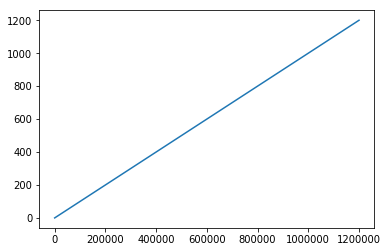

In [7]:
plt.plot(d['t'])

In [23]:
fout = open('../datasets/data1.txt','w')
fout.write('[')
for t in d['t']:
    fout.write(str(t[0]) + ' ')

fout.write(']\n[')

for torque in d['TorqueLoad']:
    fout.write(str(torque[0]) + ' ')
    
fout.write(']\n[')

for speed in d['Speed']:
    fout.write(str(speed[0]) + ' ')
    
fout.write(']\n')

fout.close()

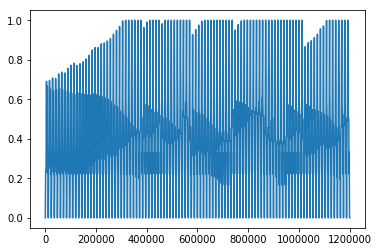

In [9]:
plt.plot(d['Speed'])

In [10]:
d2.keys()

dict_keys(['__globals__', '__version__', 'Kvalv', 't', '__header__', 'Speed'])

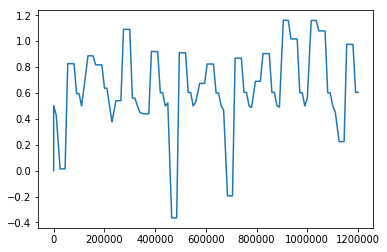

In [14]:
plt.plot(d2['Kvalv'])

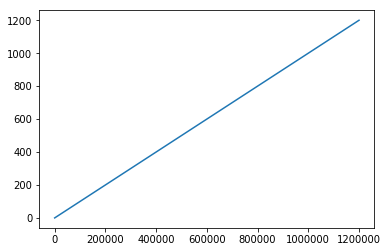

In [15]:
plt.plot(d2['t'])

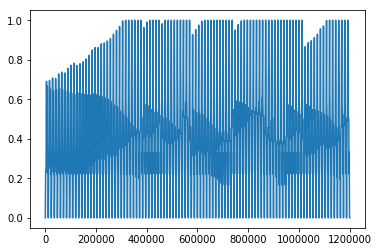

In [16]:
plt.plot(d['Speed'])

In [24]:
d['t'][-1]

array([1199.99899998])

In [27]:
new_speed = [d['Speed'][0][0]]
new_time = [d['t'][0][0]]

i = 0
for j in range(1,d['Speed'].shape[0]):
    if d['Speed'][j][0] != new_speed[i]:
        new_speed.append(d['Speed'][j][0])
        new_time.append(d['t'][j][0])
        i += 1

In [28]:
len(new_speed), len(new_time)

(406395, 406395)

In [29]:
new_torque = [d['TorqueLoad'][0][0]]
new_ttime = [d['t'][0][0]]

i = 0
for j in range(1,d['TorqueLoad'].shape[0]):
    if d['TorqueLoad'][j][0] != new_torque[i]:
        new_torque.append(d['TorqueLoad'][j][0])
        new_ttime.append(d['t'][j][0])
        i += 1

In [30]:
len(new_torque), len(new_ttime)

(295400, 295400)

In [31]:
d['TorqueLoad'].shape

(1200000, 1)

In [32]:
fout = open('../datasets/data1_compressed.txt','w')
fout.write('[')
for t in new_ttime:
    fout.write(str(t) + ' ')

fout.write(']\n[')

for torque in new_torque:
    fout.write(str(torque) + ' ')
    
fout.write(']\n[')

for t in new_time:
    fout.write(str(t) + ' ')

fout.write(']\n[')

for speed in new_speed:
    fout.write(str(speed) + ' ')
    
fout.write(']\n')

fout.close()

In [99]:
current = sio.loadmat('../datasets/DATACSdet_simulink_current_dq.mat')
voltage = sio.loadmat('../datasets/DATACSdet_simulink_voltage_dq.mat')
stator_plus = sio.loadmat('../datasets/DATACSdet_simulink_statorplus_dq.mat')
speed = sio.loadmat('../datasets/DATACSdet_simulink_speed_dq.mat')
torque = sio.loadmat('../datasets/DATACSdet_simulink_torque_dq.mat')

In [125]:
dataset = np.hstack((voltage['Voltage'], stator_plus['StatorPuls'], speed['Speed'], current['Current'], torque['Torque']))
dataset.shape

(157470, 7)

In [117]:
current['Current'].shape, voltage['Voltage'].shape, stator_plus['StatorPuls'].shape, speed['Speed'].shape, torque['Torque'].shape

((157470, 2), (157470, 2), (157470, 1), (157470, 1), (157470, 1))

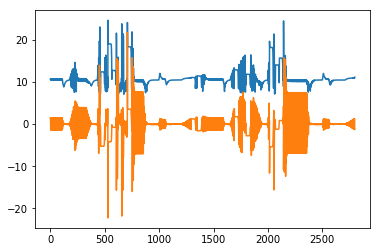

In [137]:
plt.plot(current['Current'][200:3000,0])
plt.plot(current['Current'][200:3000,1])

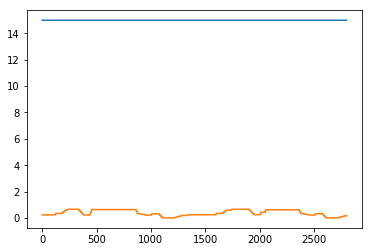

In [138]:
plt.plot(voltage['Voltage'][200:3000,0])
plt.plot(voltage['Voltage'][200:3000,1])

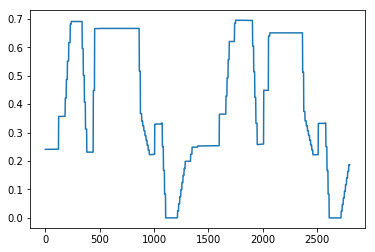

In [143]:
plt.plot(stator_plus['StatorPuls'][200:3000])

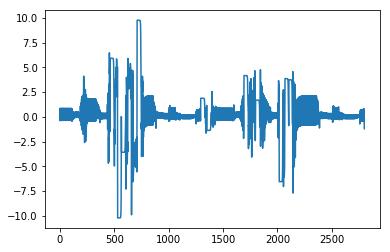

In [141]:
plt.plot(speed['Speed'][200:3000])

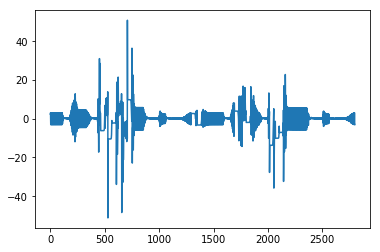

In [142]:
plt.plot(torque['Torque'][200:3000])